## Q‑Learning


In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(42)

#### Defining the Grid‑World

We’ll use a small 5×5 grid.  
- The agent starts at the top‑left corner (0,0).  
- The goal sits at the bottom‑right corner (4,4) with a reward of +10.  
- Every step costs –1 to encourage shorter paths.  
- No obstacles for simplicity, but you could add walls by checking positions in `step()`.


In [2]:
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size - 1, size - 1)
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self.agent_pos

    def step(self, action):
        x, y = self.agent_pos
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)

        self.agent_pos = (x, y)
        if self.agent_pos == self.goal:
            return self.agent_pos, 10, True
        else:
            return self.agent_pos, -1, False

    def possible_actions(self):
        return ['up', 'down', 'left', 'right']

In [3]:
def init_q_table(env):
    Q = {}
    for i in range(env.size):
        for j in range(env.size):
            Q[(i, j)] = {a: 0.0 for a in env.possible_actions()}
    return Q

env = GridWorld()
Q = init_q_table(env)

### The Q‑Learning Update Rule

At each step, we update:
  
$Q(s, a) ← Q(s, a) + α [ r + γ maxₐ' Q(s', a') – Q(s, a) ]$

- $α$ is the learning rate (how fast we update).  
- $γ$ is the discount factor (how much we value future reward).  
- $ε$‑greedy policy balances exploration vs exploitation.

In [4]:
def q_learning(env, Q, episodes=500, alpha=0.1, gamma=0.99, epsilon=0.1, max_steps=100):
    episode_rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            
            if random.random() < epsilon:
                action = random.choice(env.possible_actions())
            else:
                action = max(Q[state], key=Q[state].get)

            next_state, reward, done = env.step(action)
            total_reward += reward

            best_next = max(Q[next_state].values())
            td_target = reward + gamma * best_next
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            if done:
                break

        episode_rewards.append(total_reward)

    return Q, episode_rewards

Q, rewards = q_learning(env, Q)

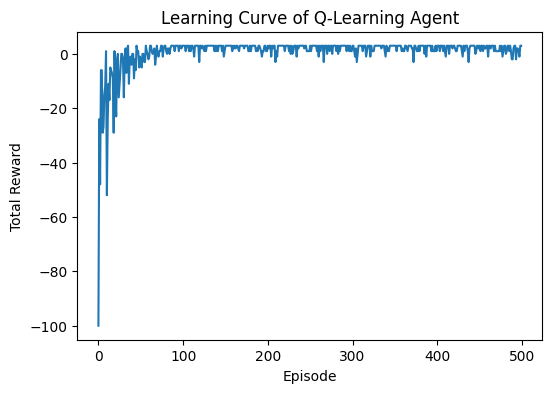

In [5]:
plt.figure(figsize=(6,4))
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Curve of Q‑Learning Agent")
plt.show()

In [6]:
policy = {}
for state, actions in Q.items():
    best_action = max(actions, key=actions.get)
    policy[state] = best_action

arrow = {'up':'↑', 'down':'↓', 'left':'←', 'right':'→'}

for i in range(env.size):
    row = ''
    for j in range(env.size):
        if (i, j) == env.goal:
            row += ' G  '
        else:
            row += f' {arrow[policy[(i,j)]]}  '
    print(row)

 →   ↓   ↓   ↓   ↓  
 →   ↓   →   ↓   ↓  
 →   →   ↓   →   ↓  
 ↑   ↓   ↓   ↓   ↓  
 →   →   →   →   G  


### What We’ve Understood from Q-Learning

#### So, what is reinforcement learning?

Reinforcement learning is all about learning by doing — or more precisely, **learning by trial and error**. You have an agent (like a robot, game character, or in our case, a little dot in a grid), and it moves around in an environment. Every time it takes an action, it gets feedback: either a reward (positive) or a penalty (negative). Based on this feedback, it slowly figures out which actions are good and which ones are not.

The agent’s goal is to learn a strategy — called a policy — that helps it make the best possible decisions to collect as much reward as it can over time. What’s cool about reinforcement learning is that the agent doesn’t need to know anything about the world in advance. It just needs a way to explore and learn from experience.

This makes reinforcement learning very different from supervised learning, where you get labelled examples. Here, there are no labels — only actions, rewards, and consequences.


#### What does Q-learning do exactly?

Q-learning is one of the most popular and easy-to-understand reinforcement learning algorithms. The $$“Q”$$ stands for $$“quality”$$ — more specifically, the quality of an action taken in a certain state. The goal is to figure out how good each action is, so the agent can always pick the best one.

In our grid world example, the agent starts with zero knowledge. Every state–action pair has a Q-value of zero. As it moves around, it starts updating these values using a simple formula that considers the reward it just got and the best possible future reward from the next state.

This update process happens over and over again. At first, the agent mostly explores — it tries random actions to see what happens. But over time, as it gains experience, it starts choosing smarter actions that have higher Q-values. This is called balancing exploration and exploitation.

The learning curve we plotted shows this nicely. In the beginning, the agent is lost and keeps taking random steps, so the rewards are negative. But after enough episodes, it figures out the shortest path to the goal, and the total reward goes up.

Finally, we extracted a policy by picking the action with the highest Q-value for every cell in the grid. The arrows we printed showed that the agent learned a direct route to the goal — exactly what we hoped for.